In [1]:
import numpy as np
import pandas as pd
import sqlite3
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as pl
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import folium
import folium.plugins
from matplotlib import animation,rc
import base64
import itertools
from subprocess import check_output


In [2]:
with sqlite3.connect('/Users/rissu/database.sqlite') as con:
    countries=pd.read_sql_query('Select * from Country',con)
    matches=pd.read_sql_query('Select * from Match',con)
    leagues=pd.read_sql_query('Select * from League',con)
    teams=pd.read_sql_query('Select * from Team',con)
    player=pd.read_sql_query('Select * from Player',con)
    player_attributes=pd.read_sql_query('Select * from Player_Attributes',con)
    sequence=pd.read_sql_query('Select * from sqlite_sequence',con)
    team_attributes=pd.read_sql_query('Select * from Team_Attributes',con)
    lat_lon=pd.read_excel('latlon.xlsx')


In [3]:
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [5]:
matches.head().iloc[:,:10]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1


In [6]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [7]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
sequence

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


In [10]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [11]:
countries.shape,leagues.shape

((11, 2), (11, 3))

In [12]:
countries_leagues=pd.merge(countries,leagues,on='id')
countries_leagues.drop('id',axis=1,inplace=True)
countries_leagues=countries_leagues.rename(columns={'name_x':'country','name_y':'league'})
countries_leagues

,country,country_id,league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A
5,Netherlands,13274,Netherlands Eredivisie
6,Poland,15722,Poland Ekstraklasa
7,Portugal,17642,Portugal Liga ZON Sagres
8,Scotland,19694,Scotland Premier League
9,Spain,21518,Spain LIGA BBVA


In [13]:
matches_new=matches[['country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]
matches_new

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [14]:
matches_new.shape,countries_leagues.shape

((25979, 10), (11, 3))

In [15]:
data=matches_new.merge(countries_leagues,left_on='country_id',
                       right_on='country_id',how='outer')

data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


In [16]:
data.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [17]:
data.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

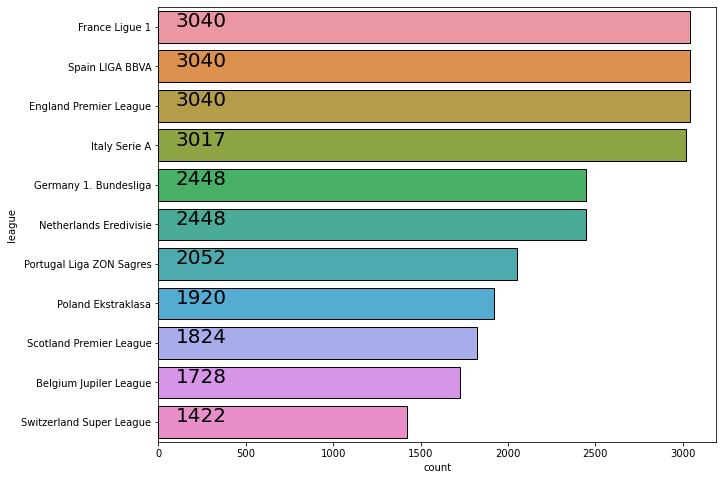

In [18]:
pl.figure(figsize=(10,8))
ax=sns.countplot(y=data['league'],
                order=data['league'].value_counts().index,
                linewidth=1,
                edgecolor='k')
for i,j in enumerate(data['league'].value_counts().values):
    ax.text(100,i,j,fontsize=20)

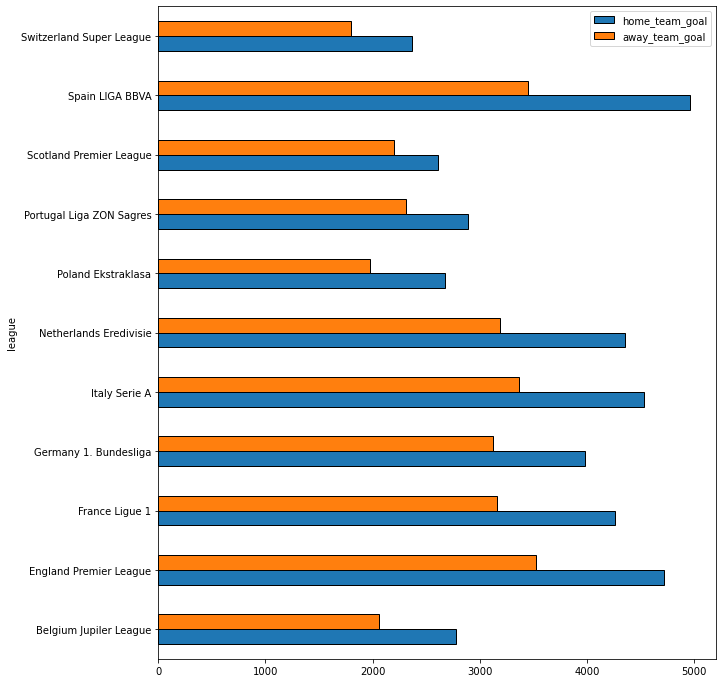

In [19]:
data.groupby('league')['home_team_goal','away_team_goal'].sum().plot(kind='barh',
                                                                    figsize=(10,12),
                                                                    linewidth=1,
                                                                    edgecolor='k')

In [20]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


In [21]:
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')
data['year']=pd.DatetimeIndex(data['date']).year

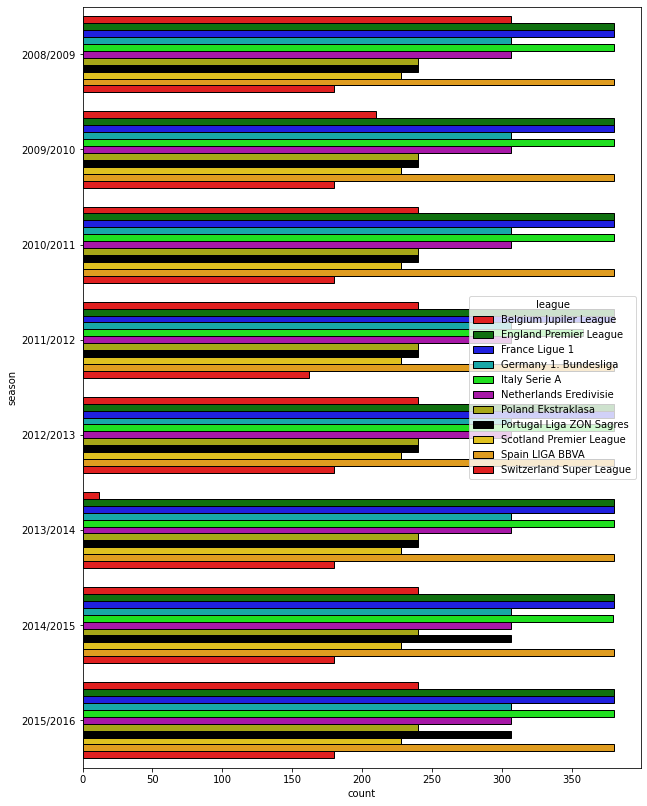

In [22]:
pl.figure(figsize=(10,14))
sns.countplot(data=data,y='season',hue='league',linewidth=1,
             edgecolor='k',
             palette=["r","g","b","c","lime","m","y","k","gold","orange"])

In [23]:
teams.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [24]:
data.head(2)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,year
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,2008
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,2008


In [25]:
data2=data.copy()
data2=data2.merge(teams,left_on='home_team_api_id',
        right_on='team_api_id',how='left')
data2=data2.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data2=data2.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})


In [26]:
data2.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,year,home_team_lname,home_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,2008,KRC Genk,GEN
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,2008,SV Zulte-Waregem,ZUL
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,2008,KSV Cercle Brugge,CEB
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,2008,KAA Gent,GEN
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,2008,FCV Dender EH,DEN


In [27]:
data2=data2.merge(teams,left_on="away_team_api_id",right_on="team_api_id",how="left")
data2 = data2.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data2 = data2.rename(columns={ 'team_long_name':"away_team_lname",'team_short_name':"away_team_sname"})
data2.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'year', 'home_team_lname',
       'home_team_sname', 'away_team_lname', 'away_team_sname'],
      dtype='object')

In [28]:
data2.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,2008,KRC Genk,GEN,Beerschot AC,BAC
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,2008,KAA Gent,GEN,RAEC Mons,MON
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,2008,FCV Dender EH,DEN,Standard de Liège,STL


In [29]:
data2.shape

(25979, 17)

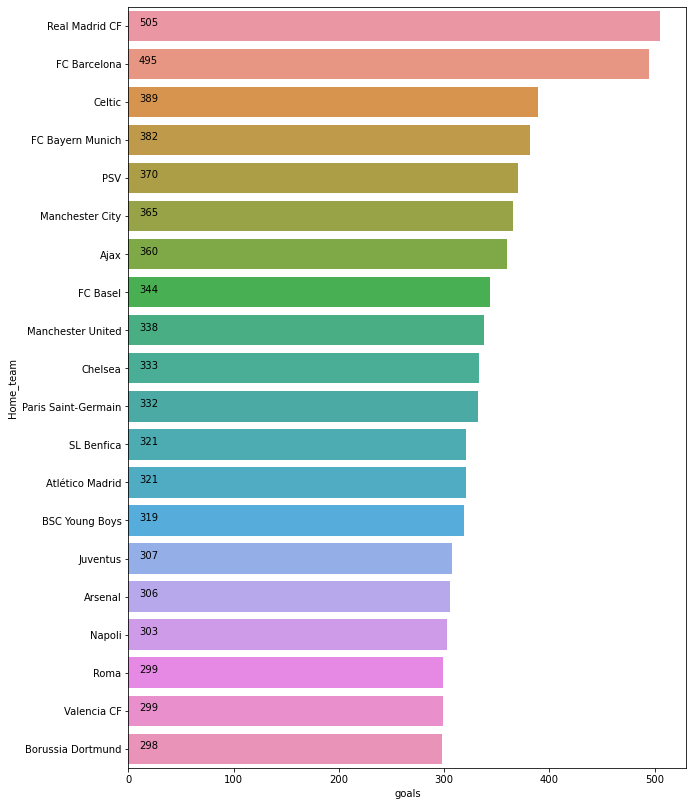

In [30]:
top_home_goals=data2.groupby('home_team_lname')['home_team_goal'].sum().reset_index().sort_values('home_team_goal',ascending=False).head(20).reset_index()
top_home_goals.drop('index',axis=1,inplace=True)
top_home_goals.columns=['Home_team','goals']
pl.figure(figsize=(10,14))
ax=sns.barplot(data=top_home_goals,x='goals',y='Home_team')
for i,j in enumerate(top_home_goals['goals']):
    ax.text(10,i,j)
pl.show()

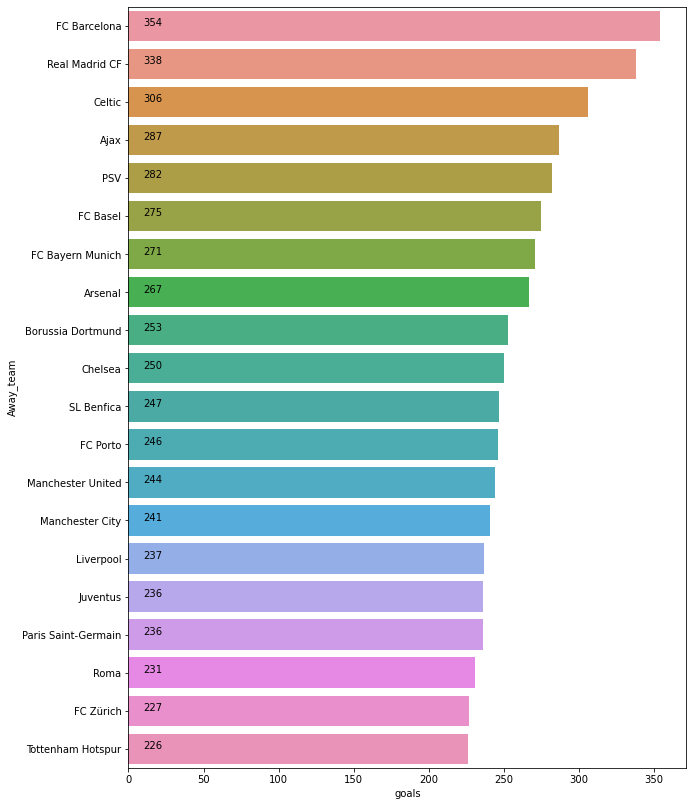

In [31]:
top_away_goals=data2.groupby('away_team_lname')['away_team_goal'].sum().reset_index().sort_values('away_team_goal',ascending=False).head(20).reset_index()
top_away_goals.drop('index',axis=1,inplace=True)
top_away_goals.columns=['Away_team','goals']
pl.figure(figsize=(10,14))
ax=sns.barplot(data=top_away_goals,x='goals',y='Away_team')
for i,j in enumerate(top_away_goals['goals']):
    ax.text(10,i,j)
pl.show()

In [32]:
data2

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,2008,KRC Genk,GEN,Beerschot AC,BAC
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,2008,KAA Gent,GEN,RAEC Mons,MON
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,2008,FCV Dender EH,DEN,Standard de Liège,STL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,Switzerland,Switzerland Super League,2015,FC St. Gallen,GAL,FC Thun,THU
25975,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,Switzerland,Switzerland Super League,2015,FC Vaduz,VAD,FC Luzern,LUZ
25976,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,Switzerland,Switzerland Super League,2015,Grasshopper Club Zürich,GRA,FC Sion,SIO
25977,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,Switzerland,Switzerland Super League,2015,Lugano,LUG,FC Zürich,ZUR


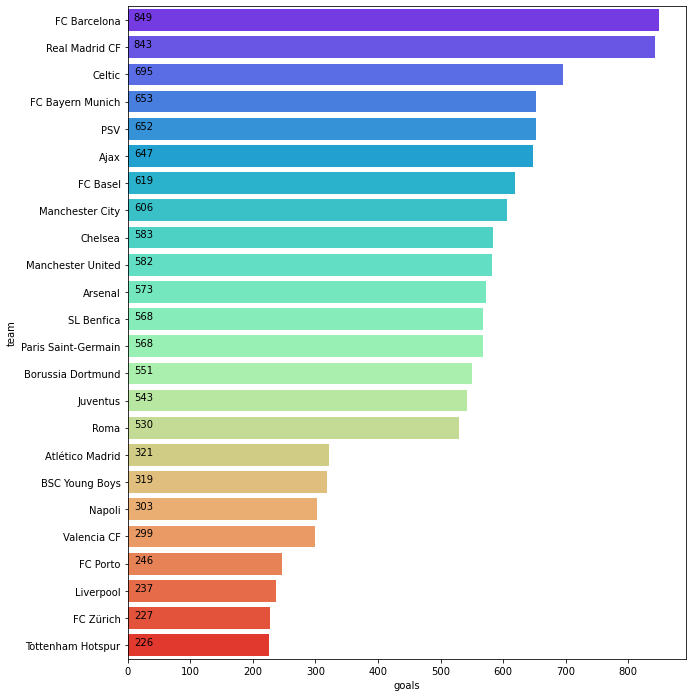

In [33]:
x=top_home_goals.copy()
y=top_away_goals.copy()
x.columns=['team','goals']
y.columns=['team','goals']
z=pd.concat([x,y])
z=z.groupby('team')['goals'].sum().reset_index().sort_values('goals',ascending=False)
pl.figure(figsize=(10,12))
ax=sns.barplot(data=z,x='goals',y='team',palette='rainbow')
for i,j in enumerate(z['goals']):
    ax.text(10,i,j)
pl.show()

In [34]:
teams_played_h=data2.groupby('home_team_lname')['match_api_id'].count().reset_index().sort_values('match_api_id',ascending=False).head(20).reset_index(drop=True)
teams_played_a=data2.groupby('away_team_lname')['match_api_id'].count().reset_index().sort_values('match_api_id',ascending=False).head(20).reset_index(drop=True)
teams_played_h.columns=['team','count']
teams_played_a.columns=['team','count']
t_played=pd.concat([teams_played_h,teams_played_a])


t_played=t_played.groupby('team')['count'].sum().reset_index().sort_values('count',ascending=False).reset_index(drop=True)
t_played

t_played.style.background_gradient()

,team,count
0,Manchester United,304
1,Liverpool,304
2,Tottenham Hotspur,304
3,Sunderland,304
4,Stoke City,304
5,Stade Rennais FC,304
6,Olympique de Marseille,304
7,Olympique Lyonnais,304
8,Málaga CF,304
9,Manchester City,304


In [35]:
data2.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'year', 'home_team_lname',
       'home_team_sname', 'away_team_lname', 'away_team_sname'],
      dtype='object')

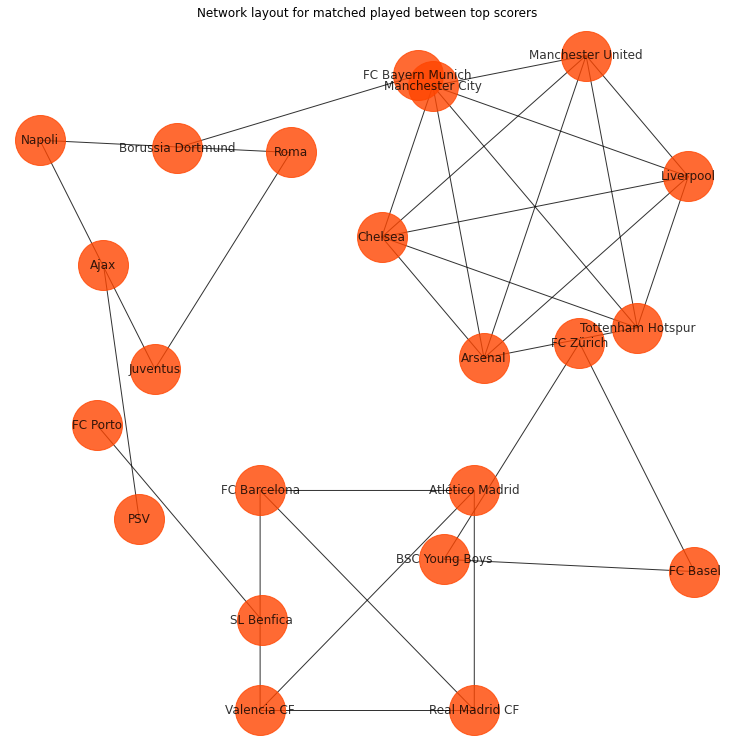

In [36]:
ts=list(z['team'])
v=data2[['home_team_lname','away_team_lname']]
v=v[(v['home_team_lname'].isin(ts))&(v['away_team_lname'].isin(ts))]
import networkx as nx
g=nx.from_pandas_edgelist(v,'home_team_lname','away_team_lname')
fig=pl.figure(figsize=(10,10))

nx.draw_kamada_kawai(g,with_labels=True,node_size=2500,node_color='OrangeRed',
                    alpha=.8)
pl.title('Network layout for matched played between top scorers')
fig.set_facecolor('white')

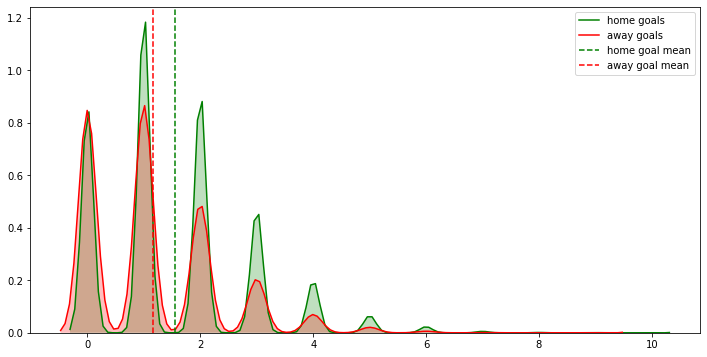

In [37]:
pl.figure(figsize=(12,6))
sns.kdeplot(data2['home_team_goal'],shade=True,c='g',label='home goals')
sns.kdeplot(data2['away_team_goal'],shade=True,c='r',label='away goals')
pl.axvline(data2['home_team_goal'].mean(),linestyle='dashed',c='g',label='home goal mean')
pl.axvline(data2['away_team_goal'].mean(),linestyle='dashed',c='r',label='away goal mean')
pl.legend()
pl.show()

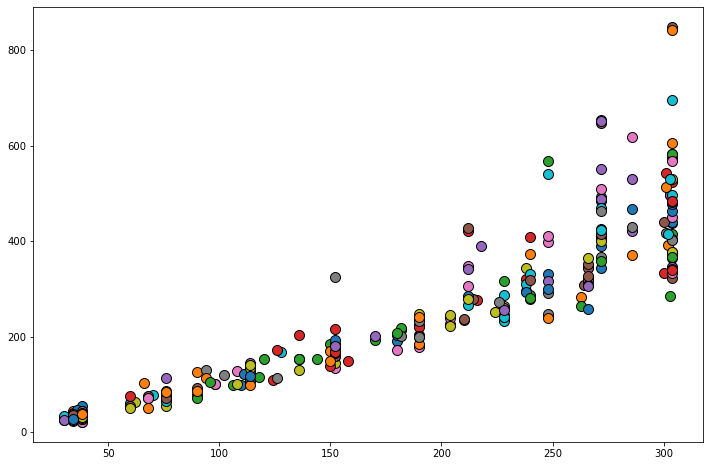

In [38]:
x=data2.groupby(['home_team_lname','league']).agg({'match_api_id':'count',
                                                'home_team_goal':'sum'}).reset_index()
y=data2.groupby(['away_team_lname','league']).agg({'match_api_id':'count',
                                                'away_team_goal':'sum'}).reset_index()
x.columns=['team','league','matches','goals']
y.columns=['team','league','matches','goals']
xy=pd.concat([x,y])
xy=xy.groupby(['team','league'])[['matches','goals']].sum().reset_index()

pl.figure(figsize=(12,8))
for i,j in xy.iterrows():
    pl.scatter(j[2],j[3],label=j[1],edgecolor='k',linewidth=1,s=100)
    
#     pl.legend()
pl.show()
    
# pl.scatter(xy['matches'],xy['goals'],c=xy['matches'])

In [39]:
xy=xy.sort_values('goals',ascending=False)

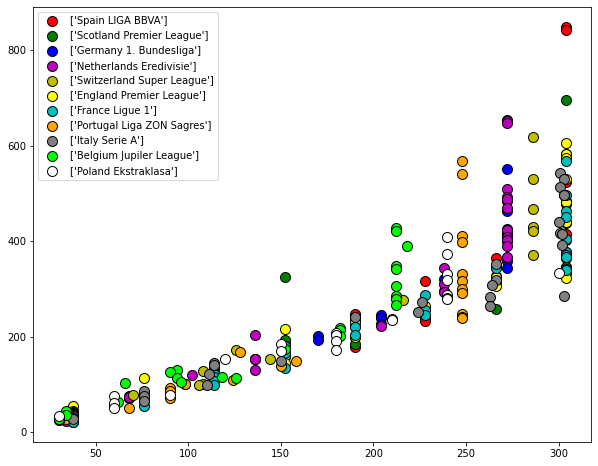

In [40]:
pl.figure(figsize=(10,8))
lg=xy['league'].unique()
c   = ["r","g","b","m","y","yellow","c","orange","grey","lime","white"]
for i,j,k in itertools.zip_longest(lg,range(len(lg)),c):
    pl.scatter('matches','goals',data=xy[xy['league']==i],label=[i],s=100,
              alpha=1,linewidths=1,edgecolors='k',color=k)
    pl.legend()
    
pl.show()

In [41]:
lg

array(['Spain LIGA BBVA', 'Scotland Premier League',
       'Germany 1. Bundesliga', 'Netherlands Eredivisie',
       'Switzerland Super League', 'England Premier League',
       'France Ligue 1', 'Portugal Liga ZON Sagres', 'Italy Serie A',
       'Belgium Jupiler League', 'Poland Ekstraklasa'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

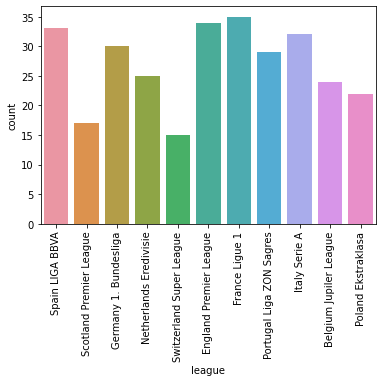

In [42]:
sns.countplot(xy['league'])
pl.xticks(rotation=90)

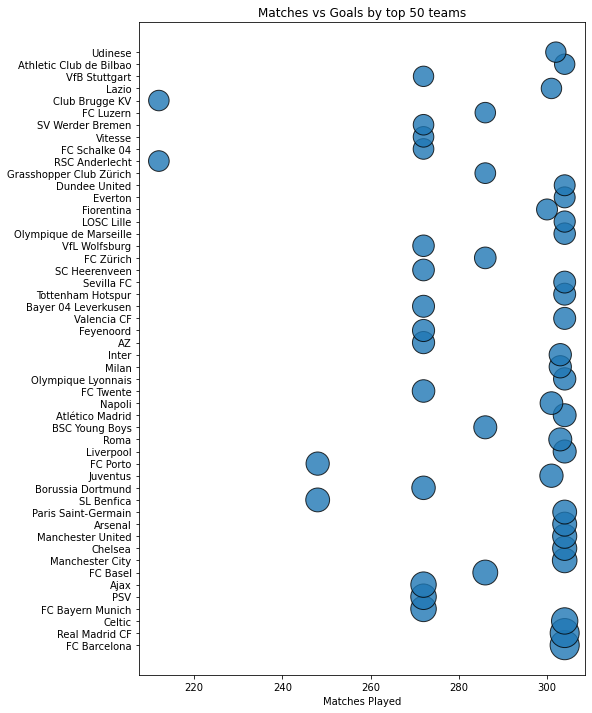

In [43]:
pl.figure(figsize=(8,12))
pl.title('Matches vs Goals by top 50 teams')
pl.scatter(y=xy['team'][:50],
          x=xy['matches'][:50],
          s=xy['goals'][:50],
          alpha=.8,edgecolor='k',
           cmap='Set2'
          )
pl.xlabel('Matches Played')
pl.show()

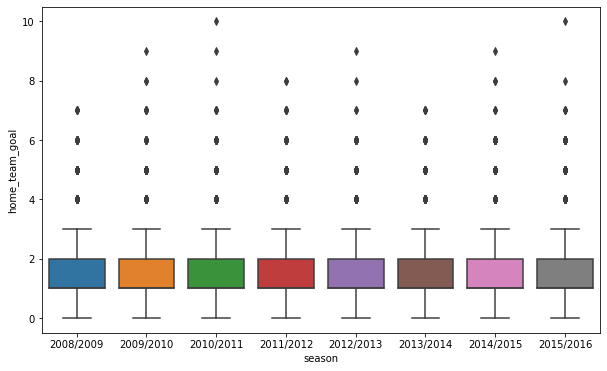

In [44]:
pl.figure(figsize=(10,6))
sns.boxplot(x=data2['season'],y=data2['home_team_goal'])

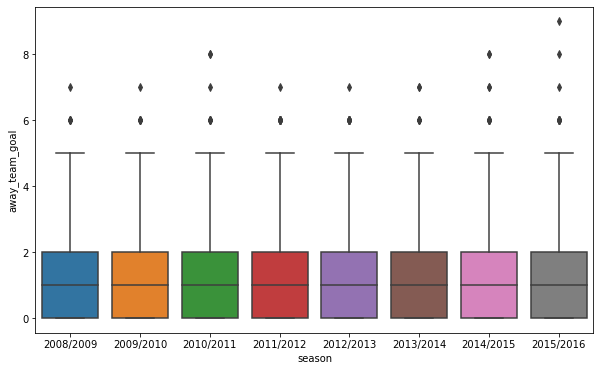

In [45]:
pl.figure(figsize=(10,6))
sns.boxplot(x=data2['season'],y=data2['away_team_goal'])

In [46]:
data2['total_goal']=data['home_team_goal']+data2['away_team_goal']
a=data2.groupby('season').agg({'total_goal':'sum'})
m=data2.groupby('season').agg({'total_goal':'mean'})
s=data2.groupby('season').agg({'total_goal':'std'})
x=data2.groupby('season').agg({'total_goal':'max'})
xx=a.merge(m,left_index=True,right_index=True,how='left')
yy=s.merge(x,left_index=True,right_index=True,how='left')
X_y=xx.merge(yy,left_index=True,right_index=True,how='left').reset_index()
X_y.columns=['season','goals','mean','std','max']


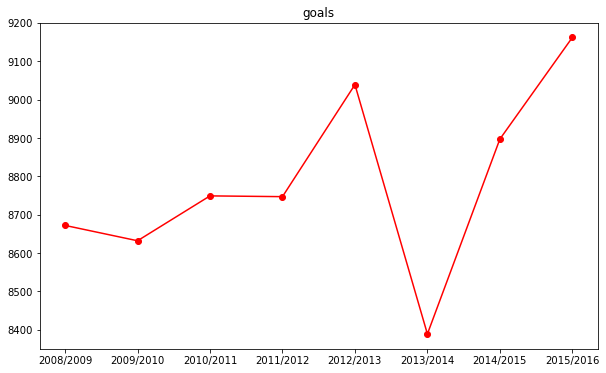

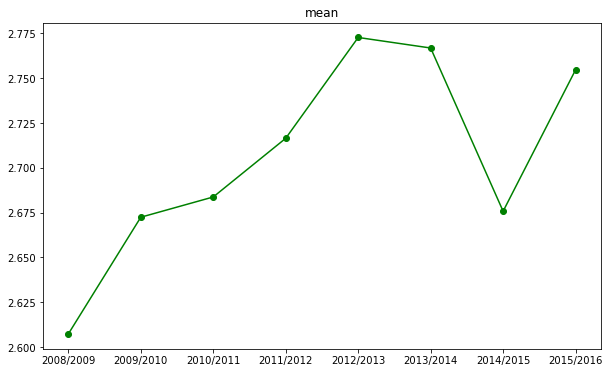

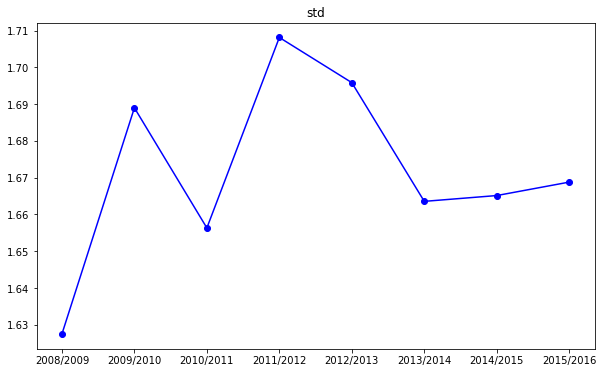

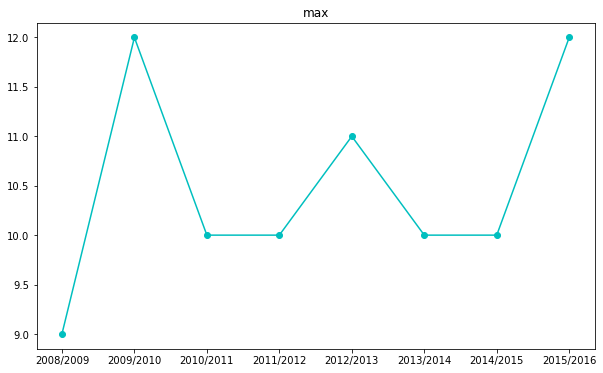

In [47]:
cs   = ["r","g","b","c"] 
for j,i in enumerate(X_y.columns[1:]):
    pl.figure(figsize=(10,6))
    pl.title(i)

    pl.plot(X_y['season'],X_y[i],marker='o',c=cs[j])
    pl.show()

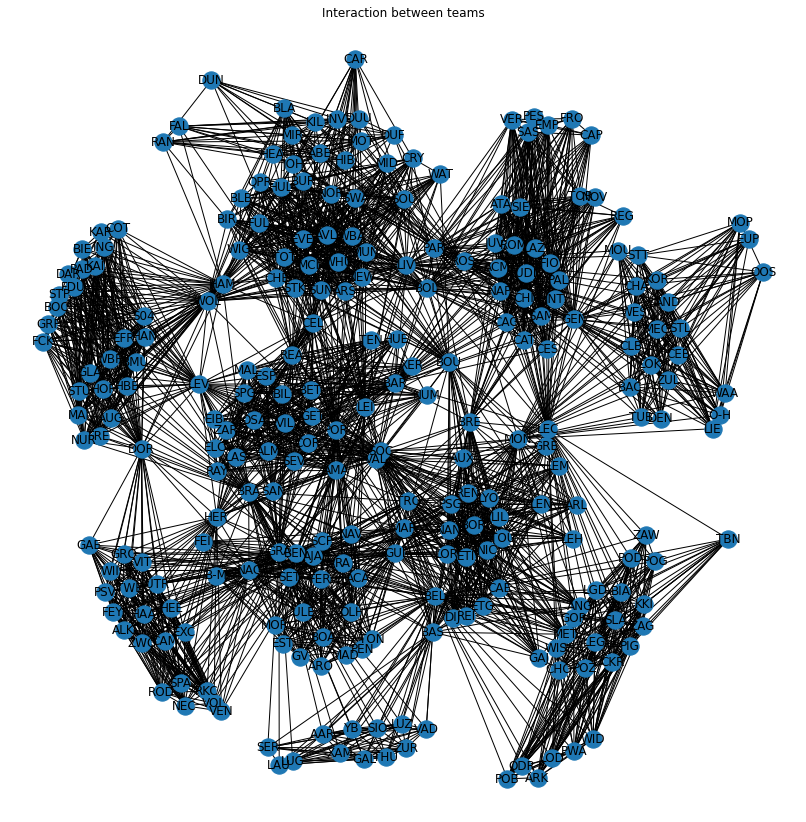

In [48]:
g=nx.from_pandas_edgelist(data2,'home_team_sname','away_team_sname')
fig=pl.figure(figsize=(11,11))
nx.draw_kamada_kawai(g,with_labels=True)
pl.title('Interaction between teams')
fig.set_facecolor('white')

In [74]:
def label(data):
    if data['home_team_goal']>data['away_team_goal']:
        return data['home_team_lname']
    elif data['away_team_goal']>data['home_team_goal']:
        return data['away_team_lname']
    else:
        return 'Draw'
    
    
data2['win']=data2.apply(lambda data: label(data),axis=1)

In [53]:
def lab(data):
    if data['home_team_goal']>data['away_team_goal']:
        return 'Home Team Win'
    elif data['home_team_goal']<data['away_team_goal']:
        return 'Away Team Win'
    else:
        return 'Draw'
    
data2['Outcome']=data2.apply(lambda data: lab(data),axis=1)

In [58]:
def losingTeam(data):
    if data['home_team_goal']>data['away_team_goal']:
        return data['away_team_lname']
    elif data['away_team_goal']>data['home_team_goal']:
        return data['home_team_lname']
    else:
        return 'Draw'
data2['lost']=data2.apply(lambda data: losingTeam(data),axis=1)

In [75]:
data2.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,league,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname,total_goal,win,Outcome,lost
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,Belgium Jupiler League,2008,KRC Genk,GEN,Beerschot AC,BAC,2,Draw,Draw,Draw
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,Belgium Jupiler League,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,Draw,Draw,Draw
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,Belgium Jupiler League,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,3,RSC Anderlecht,Away Team Win,KSV Cercle Brugge
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,Belgium Jupiler League,2008,KAA Gent,GEN,RAEC Mons,MON,5,KAA Gent,Home Team Win,RAEC Mons
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,Belgium Jupiler League,2008,FCV Dender EH,DEN,Standard de Liège,STL,4,Standard de Liège,Away Team Win,FCV Dender EH


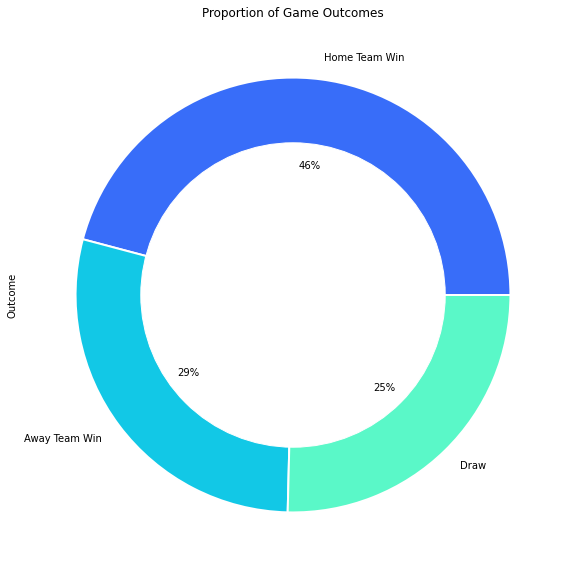

In [72]:
pl.figure(figsize=(10,10))
data2['Outcome'].value_counts().plot(kind='pie',
                                    autopct='%1.0f%%',
                                    colors=sns.color_palette('rainbow'),
                                    wedgeprops={'linewidth':2,'edgecolor':'white'})
circle=pl.Circle((0,0),.7,color='white')
pl.gca().add_artist(circle)
pl.title('Proportion of Game Outcomes')
pl.show()

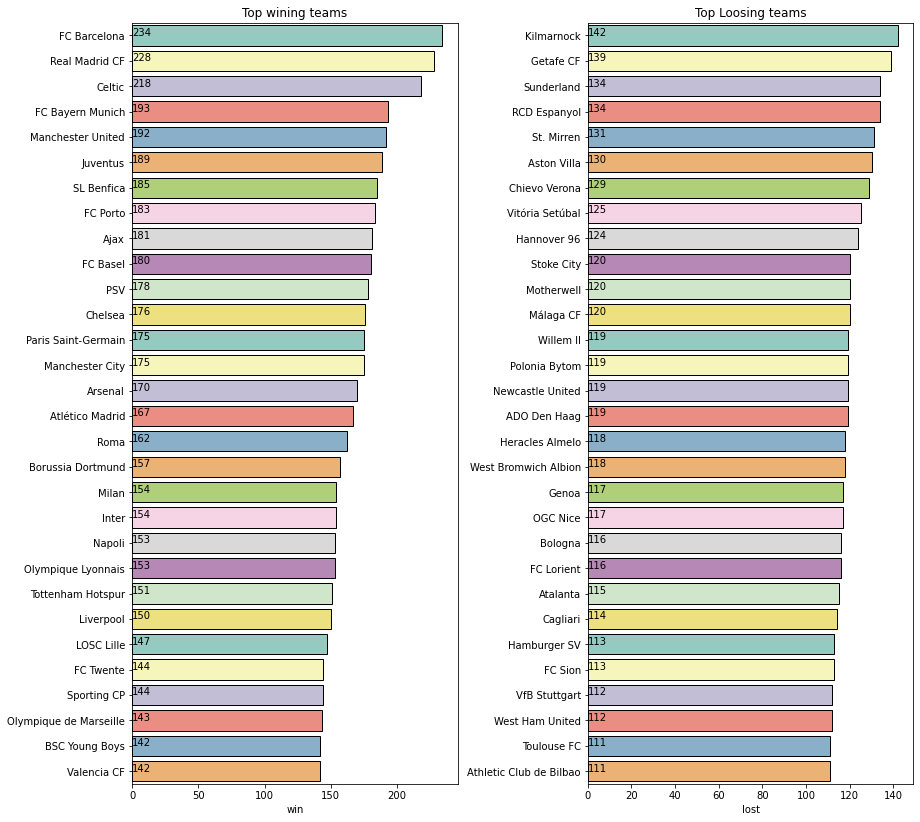

In [126]:
win=data2['win'].value_counts()[1:].reset_index()
loose=data2['lost'].value_counts()[1:].reset_index()
pl.figure(figsize=(14,14))
pl.subplot(121)
ax=sns.barplot(win['win'][:30],win['index'][:30],
              edgecolor='k',palette='Set3')
pl.title('Top wining teams')
pl.ylabel('')
for i,j in enumerate(win['win'][:30]):
    ax.text(0,i,j)


pl.subplot(122)
ax=sns.barplot(loose['lost'][:30],loose['index'][:30],
              edgecolor='k',palette='Set3')
pl.title('Top Loosing teams')
pl.ylabel('')
for i,j in enumerate(loose['lost'][:30]):
    ax.text(0,i,j)
pl.subplots_adjust(wspace=0.4)
# matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

In [163]:
f=xy.merge(win,left_on='team',right_on='index',how='left')
f=f.drop('index',axis=1)
f=f.merge(loose,left_on='team',right_on='index',how='left')
f=f.drop('index',axis=1)
draw=data2[data2['Outcome']=='Draw'][['home_team_lname','away_team_lname']]
l=draw['home_team_lname'].value_counts().reset_index()
l.columns=['team','draw']
v=draw['away_team_lname'].value_counts().reset_index()
v.columns=['team','draw']
lv=pd.concat([l,v])
lv=lv.groupby('team')['draw'].sum().reset_index()
f=f.merge(lv,left_on='team',right_on='team',how='left')
f.head(3)

,team,league,matches,goals,win,lost,draw
0,FC Barcelona,Spain LIGA BBVA,304,849,234,27,43
1,Real Madrid CF,Spain LIGA BBVA,304,843,228,40,36
2,Celtic,Scotland Premier League,304,695,218,36,50


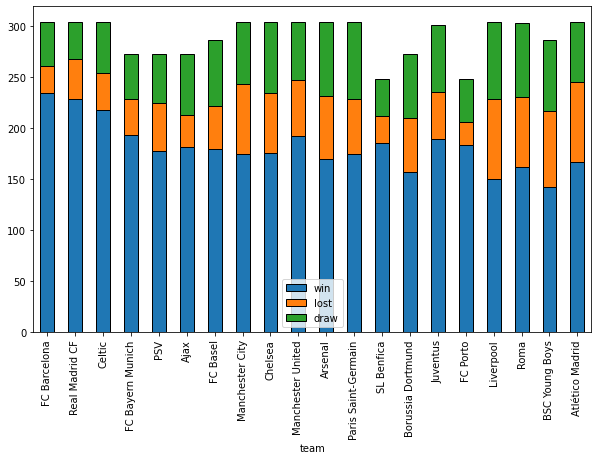

In [175]:
f=f.sort_values('goals',ascending=False)
f_new=f.copy()
f_new.index=f_new.team
f_new[['win','lost','draw']][:20].plot(kind='bar',stacked=True,
                                  figsize=(10,6),edgecolor='k',
                                  linewidth=1
                                 )

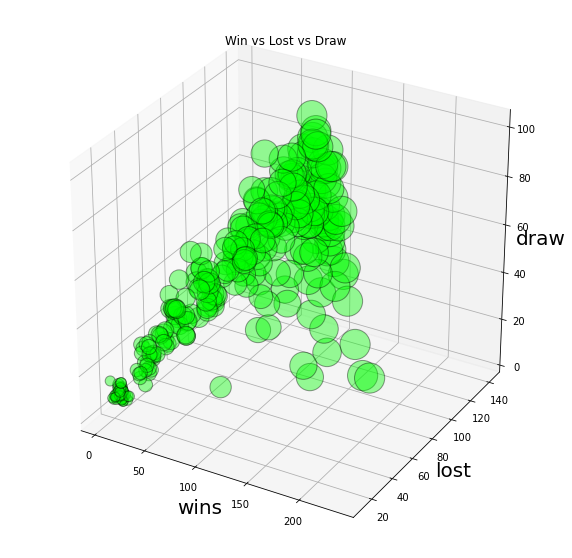

In [172]:
from mpl_toolkits.mplot3d import Axes3D
fig=pl.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(f['win'],f['lost'],f['draw'],s=f['matches']*3,
          alpha=.4,c='lime',linewidth=1,edgecolor='k')
ax.set_xlabel('wins',fontsize=20)
ax.set_ylabel('lost',fontsize=20)
ax.set_zlabel('draw',fontsize=20)
pl.title('Win vs Lost vs Draw')
pl.show()

,league,team,win
265,Spain LIGA BBVA,FC Barcelona,234
240,Scotland Premier League,Celtic,218
108,Germany 1. Bundesliga,FC Bayern Munich,193
43,England Premier League,Manchester United,192
143,Italy Serie A,Juventus,189
231,Portugal Liga ZON Sagres,SL Benfica,185
162,Netherlands Eredivisie,Ajax,181
295,Switzerland Super League,FC Basel,180
85,France Ligue 1,Paris Saint-Germain,175
195,Poland Ekstraklasa,Legia Warszawa,137


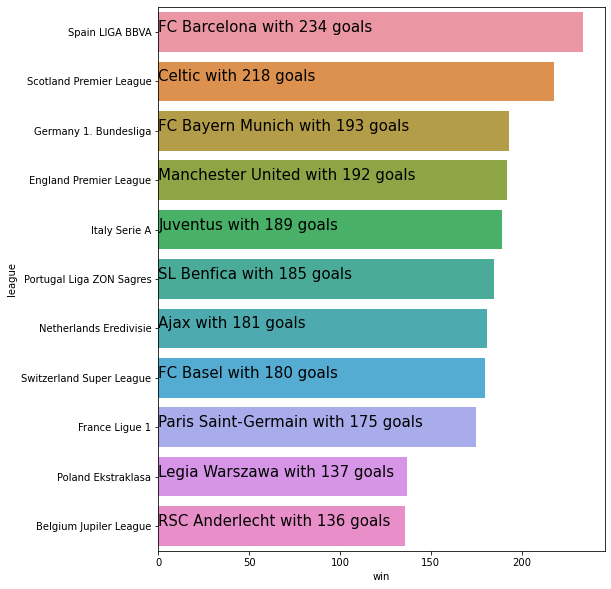

In [213]:
x=pd.DataFrame(data2.groupby(['league','win'])['win'].count())
x=x.rename(columns={'win':'team'}).reset_index()
x=x.rename(columns={'win':'team','team':'win'})
x=x.sort_values(by='win',ascending=False)
x=x[x['team']!='Draw']
x=x.drop_duplicates(subset=['league'],keep='first')
pl.figure(figsize=(8,10))
ax=sns.barplot(x['win'],x['league'])
for i,j in enumerate(x['team'].astype(str)+' with '+x['win'].astype(str)+' goals'):
    ax.text(0,i,j,fontsize=15)

x